In [15]:
import pickle
import pandas as pd
import matplotlib.pyplot as plt

In [7]:
with open('../tracker_stubs/ball_detections.pkl','rb') as f:
    ball_positions = pickle.load(f)

In [8]:
ball_positions = [x.get(1,[]) for x in ball_positions]
df_ball_positions = pd.DataFrame(ball_positions,columns=['x1','y1','x2','y2'])
df_ball_positions = df_ball_positions.interpolate()
df_ball_positions = df_ball_positions.bfill()

In [9]:
df_ball_positions

,x1,y1,x2,y2
0,893.591370,617.651062,910.530640,635.442505
1,893.591370,617.651062,910.530640,635.442505
2,877.519928,632.167297,894.790161,651.820465
3,861.448486,646.683533,879.049683,668.198425
4,848.242004,660.282104,865.107666,680.104248
...,...,...,...,...
209,1185.165527,248.533905,1198.299561,265.200439
210,1184.591064,234.108124,1194.862183,245.007339
211,1182.970947,226.428421,1194.569214,241.444809
212,1180.718750,213.691635,1194.169922,229.358780


In [10]:
df_ball_positions['mid_y'] = (df_ball_positions['y1'] + df_ball_positions['y2'])/2

In [12]:
df_ball_positions['mid_y_rolling_mean'] = df_ball_positions['mid_y'].rolling(window=5,min_periods=1,center=False).mean()

In [13]:
df_ball_positions

,x1,y1,x2,y2,mid_y,mid_y_rolling_mean
0,893.591370,617.651062,910.530640,635.442505,626.546783,626.546783
1,893.591370,617.651062,910.530640,635.442505,626.546783,626.546783
2,877.519928,632.167297,894.790161,651.820465,641.993881,631.695816
3,861.448486,646.683533,879.049683,668.198425,657.440979,638.132107
4,848.242004,660.282104,865.107666,680.104248,670.193176,644.544321
...,...,...,...,...,...,...
209,1185.165527,248.533905,1198.299561,265.200439,256.867172,283.344075
210,1184.591064,234.108124,1194.862183,245.007339,239.557732,269.291426
211,1182.970947,226.428421,1194.569214,241.444809,233.936615,256.762243
212,1180.718750,213.691635,1194.169922,229.358780,221.525208,244.398470


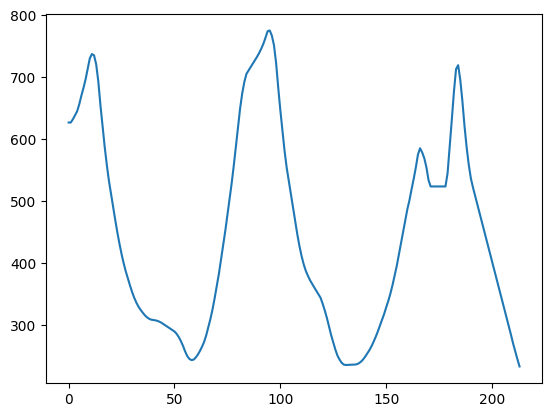

In [16]:
plt.plot(df_ball_positions['mid_y_rolling_mean'])

In [20]:
df_ball_positions['delta_y'] = df_ball_positions['mid_y_rolling_mean'].diff()

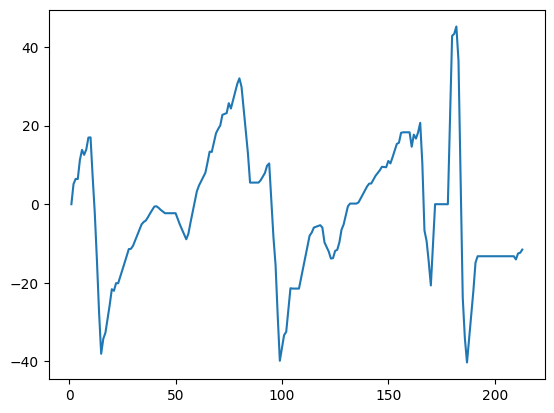

In [21]:
plt.plot(df_ball_positions['delta_y'])

In [22]:
df_ball_positions

,x1,y1,x2,y2,mid_y,mid_y_rolling_mean,delta_y
0,893.591370,617.651062,910.530640,635.442505,626.546783,626.546783,NaN
1,893.591370,617.651062,910.530640,635.442505,626.546783,626.546783,0.000000
2,877.519928,632.167297,894.790161,651.820465,641.993881,631.695816,5.149033
3,861.448486,646.683533,879.049683,668.198425,657.440979,638.132107,6.436291
4,848.242004,660.282104,865.107666,680.104248,670.193176,644.544321,6.412214
...,...,...,...,...,...,...,...
209,1185.165527,248.533905,1198.299561,265.200439,256.867172,283.344075,-13.238451
210,1184.591064,234.108124,1194.862183,245.007339,239.557732,269.291426,-14.052649
211,1182.970947,226.428421,1194.569214,241.444809,233.936615,256.762243,-12.529182
212,1180.718750,213.691635,1194.169922,229.358780,221.525208,244.398470,-12.363773


In [30]:
df_ball_positions['ball_hit'] = 0

In [34]:
minimum_change_frames_for_hit = 25
for i in range(1,len(df_ball_positions)- int(minimum_change_frames_for_hit*1.2) ):
    negative_position_change = df_ball_positions['delta_y'].iloc[i] >0 and df_ball_positions['delta_y'].iloc[i+1] <0
    positive_position_change = df_ball_positions['delta_y'].iloc[i] <0 and df_ball_positions['delta_y'].iloc[i+1] >0

    if negative_position_change or positive_position_change:
        change_count = 0 
        for change_frame in range(i+1, i+int(minimum_change_frames_for_hit*1.2)+1):
            negative_position_change_following_frame = df_ball_positions['delta_y'].iloc[i] >0 and df_ball_positions['delta_y'].iloc[change_frame] <0
            positive_position_change_following_frame = df_ball_positions['delta_y'].iloc[i] <0 and df_ball_positions['delta_y'].iloc[change_frame] >0

            if negative_position_change and negative_position_change_following_frame:
                change_count+=1
            elif positive_position_change and positive_position_change_following_frame:
                change_count+=1
    
        if change_count>minimum_change_frames_for_hit-1:
            df_ball_positions['ball_hit'].iloc[i] = 1

C:\Users\Dr.G.Mahadevan\AppData\Local\Programs\Python\Python37\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [35]:
df_ball_positions

,x1,y1,x2,y2,mid_y,mid_y_rolling_mean,delta_y,ball_hit
0,893.591370,617.651062,910.530640,635.442505,626.546783,626.546783,NaN,0
1,893.591370,617.651062,910.530640,635.442505,626.546783,626.546783,0.000000,0
2,877.519928,632.167297,894.790161,651.820465,641.993881,631.695816,5.149033,0
3,861.448486,646.683533,879.049683,668.198425,657.440979,638.132107,6.436291,0
4,848.242004,660.282104,865.107666,680.104248,670.193176,644.544321,6.412214,0
...,...,...,...,...,...,...,...,...
209,1185.165527,248.533905,1198.299561,265.200439,256.867172,283.344075,-13.238451,0
210,1184.591064,234.108124,1194.862183,245.007339,239.557732,269.291426,-14.052649,0
211,1182.970947,226.428421,1194.569214,241.444809,233.936615,256.762243,-12.529182,0
212,1180.718750,213.691635,1194.169922,229.358780,221.525208,244.398470,-12.363773,0


In [36]:
df_ball_positions[df_ball_positions['ball_hit'] == 1]

,x1,y1,x2,y2,mid_y,mid_y_rolling_mean,delta_y,ball_hit
11,779.030334,721.413167,796.152161,739.939473,730.676320,737.109019,6.995750,1
58,925.616675,240.731696,938.000098,253.488016,247.109856,243.170487,-2.017829,1
95,623.019745,748.767609,641.288086,767.035583,757.901596,775.047400,1.157437,1
131,716.940430,229.129288,728.339081,242.071182,235.600235,235.281590,-0.537468,1


In [37]:
frame_nums_with_ball_hits = df_ball_positions[df_ball_positions['ball_hit'] == 1].index.tolist()

In [38]:
frame_nums_with_ball_hits

[11, 58, 95, 131]